# Flight Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\DELL\\Desktop\\Data Trained\\Evaluation Projects\\\Flight_Ticket_Participant_Datasets\\Data_Train.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## EDA

In [3]:
df.shape

(10683, 11)

In [4]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [5]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [6]:
df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [7]:
df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [8]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [9]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [10]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2.0,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2.0,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1.0,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1.0,No info,13302,01,03,2019


In [12]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [13]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
dtype: int64

### Since the dataset is big, the rows with these 2 missing values can be deleted.

In [14]:
df=df.dropna()

In [15]:
df.shape

(10682, 13)

### There are many outliers in the Price column.

In [16]:
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]

In [17]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10,2h 50m,0.0,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2.0,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25,19h,2.0,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1.0,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1.0,No info,13302,01,03,2019


### We can divide the Deperture timings into 4 quarters like Morning, Afternoon, Evening, Night and Mid Night. 

In [18]:
df['Dep_Time']=df['Dep_Time'].str.split(':').str[0]

In [19]:
df['Dep_Time']=df['Dep_Time'].astype(int)

In [20]:
for i in df.index:
    if df['Dep_Time'][i]>=0 and df['Dep_Time'][i]<6:
        df['Dep_Time'][i]='Mid Night'
    elif df['Dep_Time'][i]>=6 and df['Dep_Time'][i]<12:
        df['Dep_Time'][i]='Morning'
    elif df['Dep_Time'][i]>=12 and df['Dep_Time'][i]<18:
        df['Dep_Time'][i]='Afternoon & Evening'
    else:
        df['Dep_Time'][i]='Night'

In [21]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,Night,01:10,2h 50m,0.0,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,Mid Night,13:15,7h 25m,2.0,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,Morning,04:25,19h,2.0,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,Night,23:30,5h 25m,1.0,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,Afternoon & Evening,21:35,4h 45m,1.0,No info,13302,01,03,2019


In [22]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [23]:
### The duration is in Hours and Minutes, We can convert them into Hours.

df['Duration']=df['Duration'].str.split(' ').str[0]
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,Night,01:10,2h,0.0,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,Mid Night,13:15,7h,2.0,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,Morning,04:25,19h,2.0,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,Night,23:30,5h,1.0,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,Afternoon & Evening,21:35,4h,1.0,No info,13302,01,03,2019


In [24]:
### We should convert Duration time into integer value.

df['Duration']=df['Duration'].str.split('h').str[0]
df['Duration']=df['Duration'].str.split('m').str[0]
df['Duration']=df['Duration'].astype(int)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

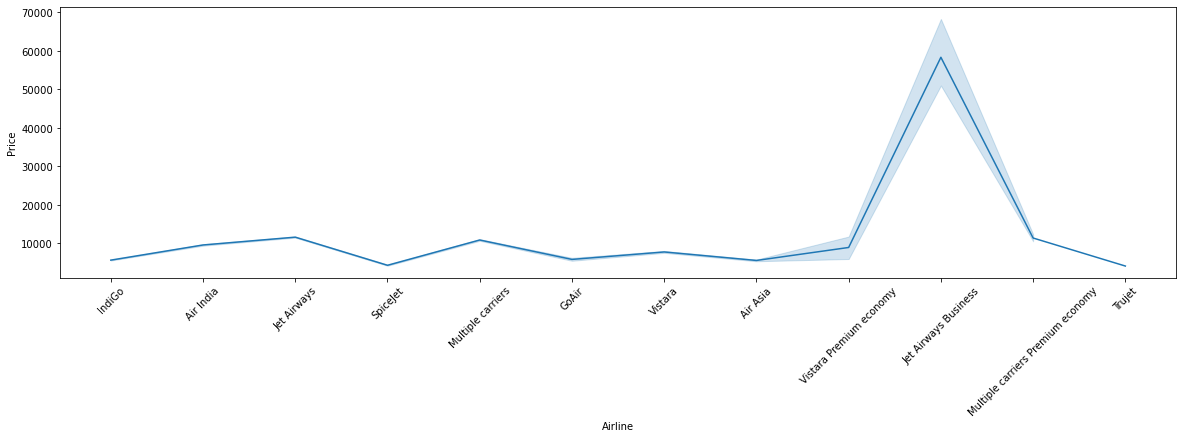

In [25]:
plt.figure(figsize=(20,5))
sns.lineplot(df['Airline'],df['Price'])
plt.xticks(rotation=45)

### Among all airlines, Jet Airways is costly.

<AxesSubplot:xlabel='Duration', ylabel='Price'>

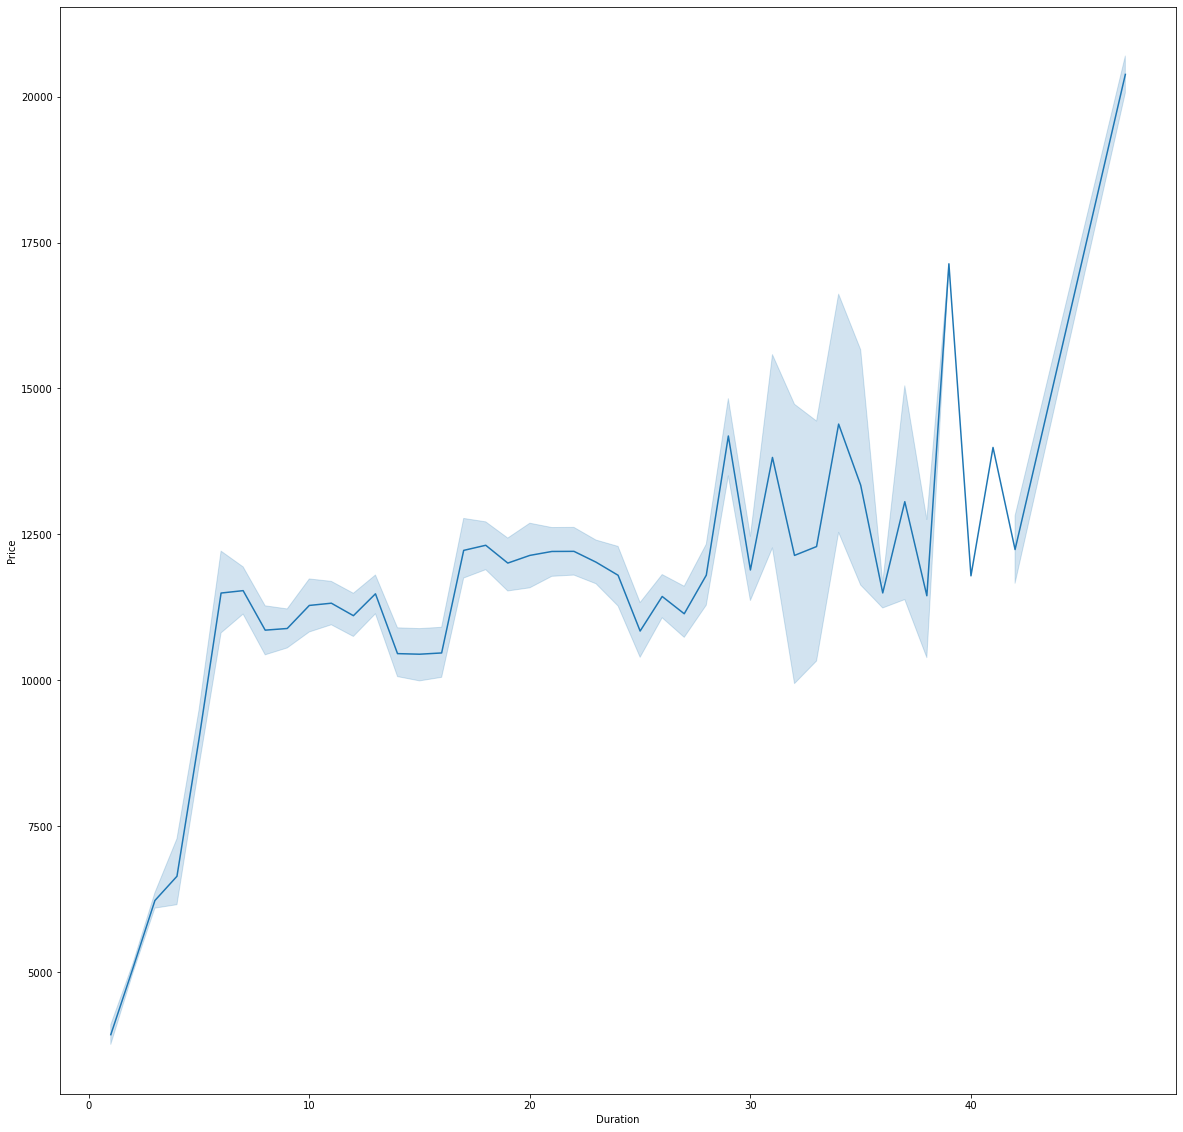

In [26]:
plt.figure(figsize=(20,20))
sns.lineplot(df['Duration'],df['Price'])

### If the duration of journey is less, The price of ticket is also less.

<AxesSubplot:xlabel='Month', ylabel='Price'>

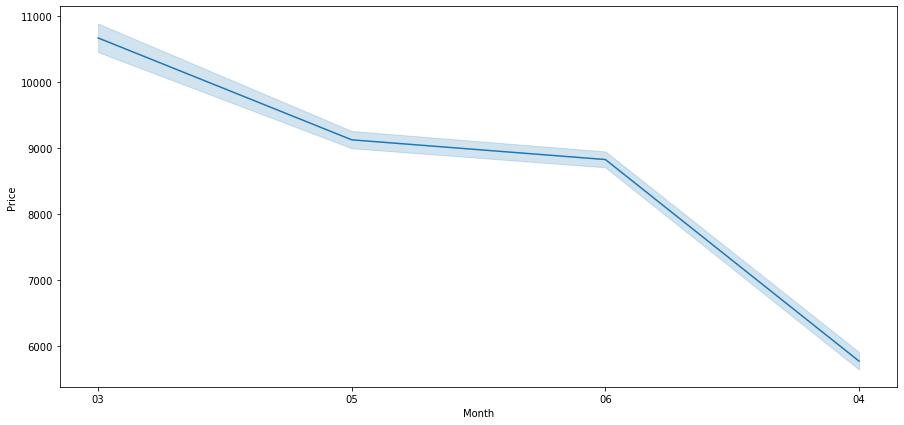

In [27]:
plt.figure(figsize=(15,7))
sns.lineplot(df['Month'],df['Price'])

### The price of the flight ticket is maximum in the month of March and minimum in April month

In [28]:
df['Year'].value_counts()

2019    10682
Name: Year, dtype: int64

### We can drop this year column.

In [29]:
df.drop(['Year'],axis=1,inplace=True)

<AxesSubplot:xlabel='Date', ylabel='Price'>

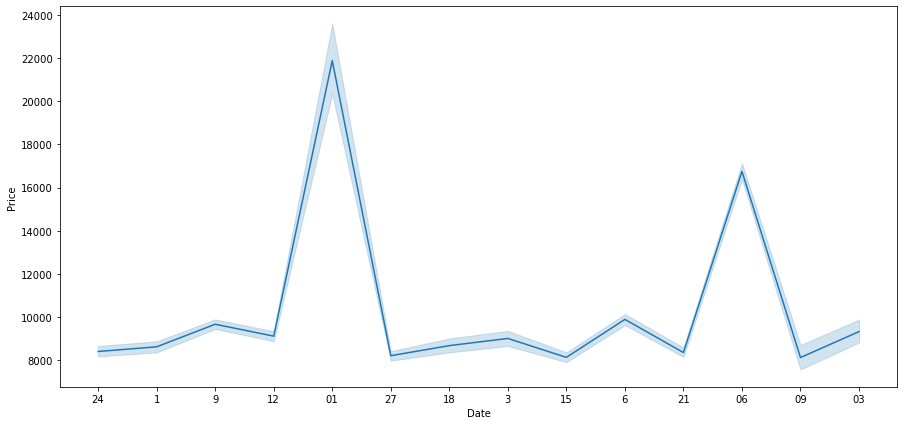

In [30]:
plt.figure(figsize=(15,7))
sns.lineplot(df['Date'],df['Price'])

<AxesSubplot:xlabel='Price', ylabel='Count'>

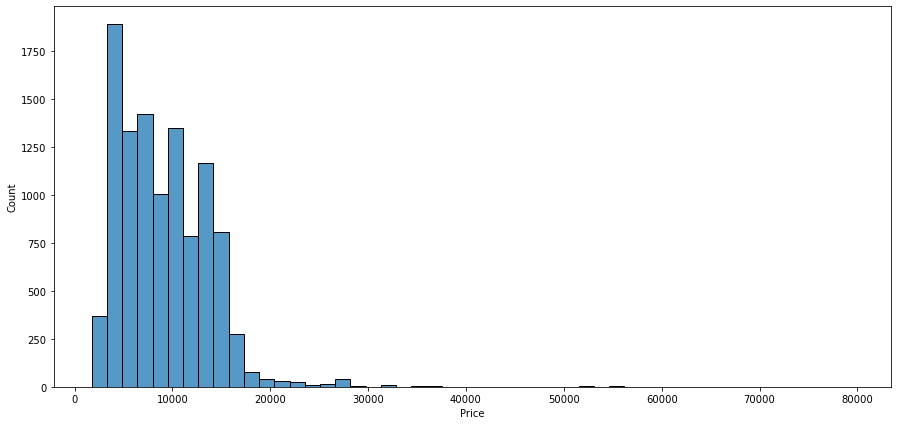

In [31]:
plt.figure(figsize=(15,7))
sns.histplot(df['Price'],bins=50)

### Most of the Ticket prices are in the range of 5000.

<AxesSubplot:xlabel='Source', ylabel='count'>

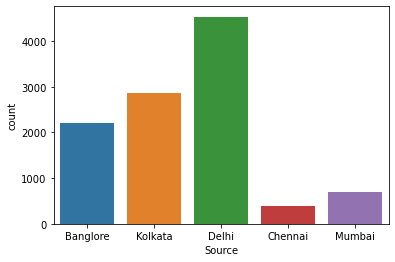

In [32]:
sns.countplot(df['Source'])

### Most of the flights starts from Delhi.

<AxesSubplot:xlabel='Destination', ylabel='count'>

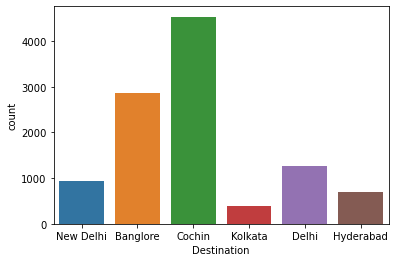

In [33]:
sns.countplot(df['Destination'])

### Most of the flights Destination is Cochin.

In [34]:
### Route column can be dropped, Since it gives same information as Total_Stops column.

df.drop(['Route'],axis=1,inplace=True)

In [35]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,IndiGo,Banglore,New Delhi,Night,01:10,2,0.0,No info,3897,24,03
1,Air India,Kolkata,Banglore,Mid Night,13:15,7,2.0,No info,7662,1,05
2,Jet Airways,Delhi,Cochin,Morning,04:25,19,2.0,No info,13882,9,06
3,IndiGo,Kolkata,Banglore,Night,23:30,5,1.0,No info,6218,12,05
4,IndiGo,Banglore,New Delhi,Afternoon & Evening,21:35,4,1.0,No info,13302,01,03


In [36]:
### Arrival_Time column can be dropped, Since the same information is given by Duration Column.

df.drop(['Arrival_Time'],axis=1,inplace=True)

<AxesSubplot:xlabel='Dep_Time', ylabel='Price'>

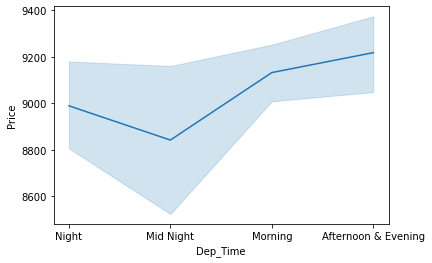

In [37]:
sns.lineplot(df['Dep_Time'],df['Price'])

### The Price of Flight Tickets are maximum at the time of Afternoon to Evening

## Encoding of Training Set

In [38]:
from sklearn.preprocessing import LabelEncoder
lab1=LabelEncoder()
lab2=LabelEncoder()
lab3=LabelEncoder()
lab4=LabelEncoder()
lab5=LabelEncoder()
lab6=LabelEncoder()
lab7=LabelEncoder()
lab8=LabelEncoder()
lab9=LabelEncoder()
df['Airline']=lab1.fit_transform(df['Airline'].values.reshape(-1,1))
df['Source']=lab2.fit_transform(df['Source'].values.reshape(-1,1))
df['Destination']=lab3.fit_transform(df['Destination'].values.reshape(-1,1))
df['Dep_Time']=lab4.fit_transform(df['Dep_Time'].values.reshape(-1,1))


df['Additional_Info']=lab7.fit_transform(df['Additional_Info'].values.reshape(-1,1))
df['Date']=lab8.fit_transform(df['Date'].values.reshape(-1,1))
df['Month']=lab9.fit_transform(df['Month'].values.reshape(-1,1))

In [39]:
df.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,3,0,5,3,2,0.0,8,3897,9,0
1,1,3,0,1,7,2.0,8,7662,4,2
2,4,2,1,2,19,2.0,8,13882,13,3
3,3,3,0,3,5,1.0,8,6218,5,2
4,3,0,5,0,4,1.0,8,13302,0,0


<AxesSubplot:>

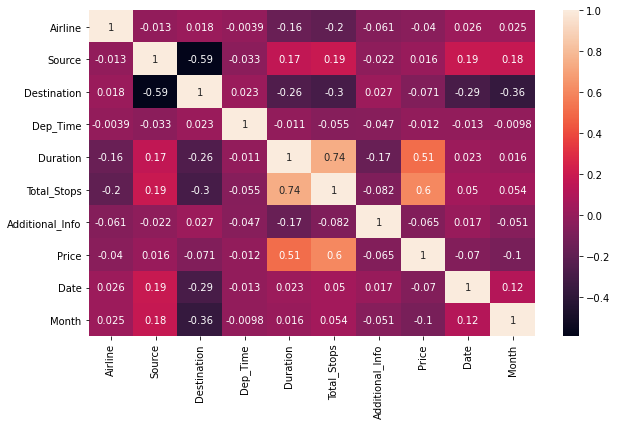

In [40]:
cor=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True)

In [41]:
x=df.drop(['Price'],axis=1)
y=df['Price']

## Scaling of Train Data

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Date,Month
0,-0.410805,-1.658359,2.416534,1.212026,-0.970718,-1.220666,0.499921,0.179343,-1.467402
1,-1.261152,0.890014,-0.973812,-0.601006,-0.382073,1.741432,0.499921,-1.373877,0.250289
2,0.014369,0.040556,-0.295743,0.305510,1.030673,1.741432,0.499921,1.421919,1.109135
3,-0.410805,0.890014,-0.973812,1.212026,-0.617531,0.260383,0.499921,-1.063233,0.250289
4,-0.410805,-1.658359,2.416534,-1.507522,-0.735260,0.260383,0.499921,-2.616453,-1.467402


## VIF

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,1.052278,Airline
1,1.546337,Source
2,1.925460,Destination
3,1.007923,Dep_Time
4,2.298111,Duration
5,2.324530,Total_Stops
6,1.047218,Additional_Info
7,1.097991,Date
8,1.169034,Month


### Here for all the columns, VIF score is less than 5. Therefore, Multi-Collinearity is not there.

## Loading Test Data

In [44]:
x1_test=pd.read_csv('C:\\Users\\DELL\\Desktop\\Data Trained\\Evaluation Projects\\\Flight_Ticket_Participant_Datasets\\Test_set.csv')
x1_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [45]:
x1_test.shape

(2671, 10)

In [46]:
x1_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [47]:
x1_test['Date']=x1_test['Date_of_Journey'].str.split('/').str[0]
x1_test['Month']=x1_test['Date_of_Journey'].str.split('/').str[1]
x1_test['Year']=x1_test['Date_of_Journey'].str.split('/').str[2]

x1_test.drop(['Date_of_Journey'],axis=1,inplace=True)
x1_test.drop(['Year'],axis=1,inplace=True)

In [48]:
x1_test['Dep_Time']=x1_test['Dep_Time'].str.split(':').str[0]
x1_test['Dep_Time']=x1_test['Dep_Time'].astype(int)

for i in x1_test.index:
    if x1_test['Dep_Time'][i]>=0 and x1_test['Dep_Time'][i]<6:
        x1_test['Dep_Time'][i]='Mid Night'
    elif x1_test['Dep_Time'][i]>=6 and x1_test['Dep_Time'][i]<12:
        x1_test['Dep_Time'][i]='Morning'
    elif x1_test['Dep_Time'][i]>=12 and x1_test['Dep_Time'][i]<18:
        x1_test['Dep_Time'][i]='Afternoon & Evening'
    else:
        x1_test['Dep_Time'][i]='Night'

In [49]:
x1_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [50]:
x1_test['Duration']=x1_test['Duration'].str.split(' ').str[0]

In [51]:
### We should convert Duration time into integer value.

x1_test['Duration']=x1_test['Duration'].str.split('h').str[0]
x1_test['Duration']=x1_test['Duration'].str.split('m').str[0]
x1_test['Duration']=x1_test['Duration'].astype(int)

In [52]:
### Route column can be dropped, Since it gives same information as Total_Stops column.

x1_test.drop(['Route'],axis=1,inplace=True)

In [53]:
### Arrival_Time column can be dropped, Since the same information is given by Duration Column.

x1_test.drop(['Arrival_Time'],axis=1,inplace=True)

In [54]:
x1_test.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Date,Month
0,Jet Airways,Delhi,Cochin,Afternoon & Evening,10,1,No info,6,06
1,IndiGo,Kolkata,Banglore,Morning,4,1,No info,12,05
2,Jet Airways,Delhi,Cochin,Night,23,1,In-flight meal not included,21,05
3,Multiple carriers,Delhi,Cochin,Morning,13,1,No info,21,05
4,Air Asia,Banglore,Delhi,Night,2,0,No info,24,06


## Encoding of Test Set

In [55]:
x1_test['Airline']=lab1.fit_transform(x1_test['Airline'].values.reshape(-1,1))
x1_test['Source']=lab2.fit_transform(x1_test['Source'].values.reshape(-1,1))
x1_test['Destination']=lab3.fit_transform(x1_test['Destination'].values.reshape(-1,1))
x1_test['Dep_Time']=lab4.fit_transform(x1_test['Dep_Time'].values.reshape(-1,1))


x1_test['Additional_Info']=lab7.fit_transform(x1_test['Additional_Info'].values.reshape(-1,1))
x1_test['Date']=lab8.fit_transform(x1_test['Date'].values.reshape(-1,1))
x1_test['Month']=lab9.fit_transform(x1_test['Month'].values.reshape(-1,1))
x1_test.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Date,Month
0,4,2,1,0,10,1,5,12,3
1,3,3,0,2,4,1,5,5,2
2,4,2,1,3,23,1,3,8,2
3,6,2,1,2,13,1,5,8,2
4,0,0,2,3,2,0,5,9,3


## Scaling of Test Data

In [56]:
x1_test=pd.DataFrame(scaler.transform(x1_test),columns=x1_test.columns)
x1_test.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Date,Month
0,0.014369,0.040556,-0.295743,-1.507522,-0.028887,0.260383,-1.970848,1.111275,1.109135
1,-0.410805,0.890014,-0.973812,0.305510,-0.735260,0.260383,-1.970848,-1.063233,0.250289
2,0.014369,0.040556,-0.295743,1.212026,1.501589,0.260383,-3.618027,-0.131301,0.250289
3,0.864716,0.040556,-0.295743,0.305510,0.324300,0.260383,-1.970848,-0.131301,0.250289
4,-1.686326,-1.658359,0.382326,1.212026,-0.970718,-1.220666,-1.970848,0.179343,1.109135


## Loading of Y_test data

In [57]:
y1_test=pd.read_csv('C:\\Users\\DELL\\Desktop\\Data Trained\\Evaluation Projects\\\Flight_Ticket_Participant_Datasets\\Sample_submission.csv')
y1_test.head()

,Price
0,15998
1,16612
2,25572
3,25778
4,16934


## Choosing Random State Value

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxr2=0
maxran=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>maxr2:
        maxr2=r2
        maxran=i
print('max r2=',maxr2,'ran state=',maxran)

max r2= 0.46884284870799287 ran state= 64


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=maxran)

## Model Selection with Hyper Parameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV

### Lasso Regression

In [61]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10)),'fit_intercept':[True,False],'selection':['cyclic', 'random']}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'fit_intercept': True, 'random_state': 9, 'selection': 'random'}


In [62]:
ls = Lasso(alpha=10,fit_intercept=True,random_state=9,selection='random')
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
r2=r2_score(y_test,pred)
a1=r2*100
a1

46.92713935826478

### Ridge Regression

In [63]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'max_iter':list(range(1,11)),'normalize':[True,False],'copy_X':[True,False]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'copy_X': True, 'max_iter': 1, 'normalize': True}


In [64]:
rd = Ridge(alpha=0.001,copy_X=True,max_iter=1,normalize=True)
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
r2=r2_score(y_test,pred)
a2=r2*100
a2

46.88711947350448

## Decision Tree Regression

In [65]:
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'splitter':['best', 'random'],'max_depth':list(range(1,15,2)),'max_features':['auto', 'sqrt', 'log2'],
           'max_leaf_nodes':[None,10,20,30,40,50,60,70,80,90]}
dtr=DecisionTreeRegressor()
clf = GridSearchCV(dtr,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'max_depth': 11, 'max_features': 'auto', 'max_leaf_nodes': None, 'splitter': 'best'}


In [66]:
dtr = DecisionTreeRegressor(criterion='friedman_mse',max_depth=11,max_features='auto',splitter='best',max_leaf_nodes=None)
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
r2=r2_score(y_test,pred)
a3=r2*100
a3

85.77174157125285

### Linear Regression

In [67]:
parameters = {'fit_intercept':[True,False], 'copy_X':[True,False],'normalize':[True,False],'n_jobs':list(range(1,11))}
lr=LinearRegression()
clf = GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': True}


In [68]:
lr=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=True)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
r2=r2_score(y_test,pred)
a4=r2*100
a4

46.88428487079928

## Cross Validation

In [69]:
from sklearn.model_selection import cross_val_score
cv1=(cross_val_score(ls,x,y,cv=5).mean())*100
cv2=(cross_val_score(rd,x,y,cv=5).mean())*100
cv3=(cross_val_score(dtr,x,y,cv=5).mean())*100
cv4=(cross_val_score(lr,x,y,cv=5).mean())*100
print(cv1,cv2,cv3,cv4)

41.03692986981169 41.02756074880881 80.34187909289 41.027277569379066


In [70]:
print((a1-cv1),(a2-cv2),(a3-cv3),(a4-cv4))

5.890209488453088 5.859558724695667 5.42986247836285 5.857007301420211


### We can choose Decision Tree Regressor as our model, since its r2 score and cv_score has least difference.

In [71]:
fin_dtr = DecisionTreeRegressor(criterion='friedman_mse',max_depth=11,max_features='auto',splitter='best',max_leaf_nodes=None)
fin_dtr.fit(x_train,y_train)
pred=fin_dtr.predict(x_test)
r2=r2_score(y_test,pred)
fin_r2=r2*100
fin_r2

86.19650320131433

## Predicting the given Test dataset.

In [72]:
fin_pred=fin_dtr.predict(x1_test)

In [77]:
pri=pd.DataFrame({})
pri['Pred_Price']=fin_pred
pri['Actual Price']=y1_test
pri.head()

,Pred_Price,Actual Price
0,10361.370370,15998
1,7108.137931,16612
2,12846.681159,25572
3,10058.857143,25778
4,3728.181818,16934


## Saving the Model

In [78]:
import joblib
joblib.dump(fin_dtr,'Final_price_mod.pkl')

['Final_price_mod.pkl']